## Business Understanding
 *This task is to predict possible loan defaulters 

In [4]:
# loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [6]:
# reading data from my storage
loan = pd.read_csv(r"C:\Users\admin\Documents\python file\Training Data.csv\Training Data.csv")
print(f'The shape of the data is {loan.shape}')# checking the shape of the data

The shape of the data is (252000, 13)


In [3]:
# checking the head of the data
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# data information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# checking for missing values
loan.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### EDA

In [7]:
loan.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


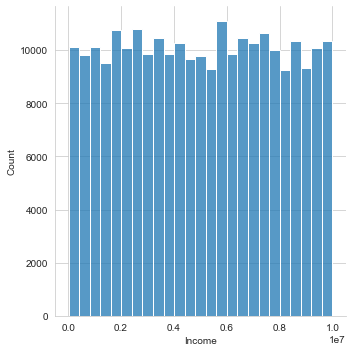

In [7]:
# checking the distribution of the income
sns.displot(x='Income', data=loan, bins=25)

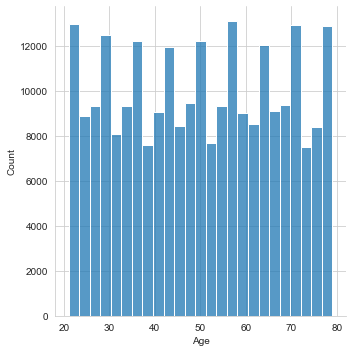

In [8]:
# checking the distribution of the Age
sns.displot(x='Age', data=loan, bins=25)

<AxesSubplot:xlabel='Married/Single', ylabel='Income'>

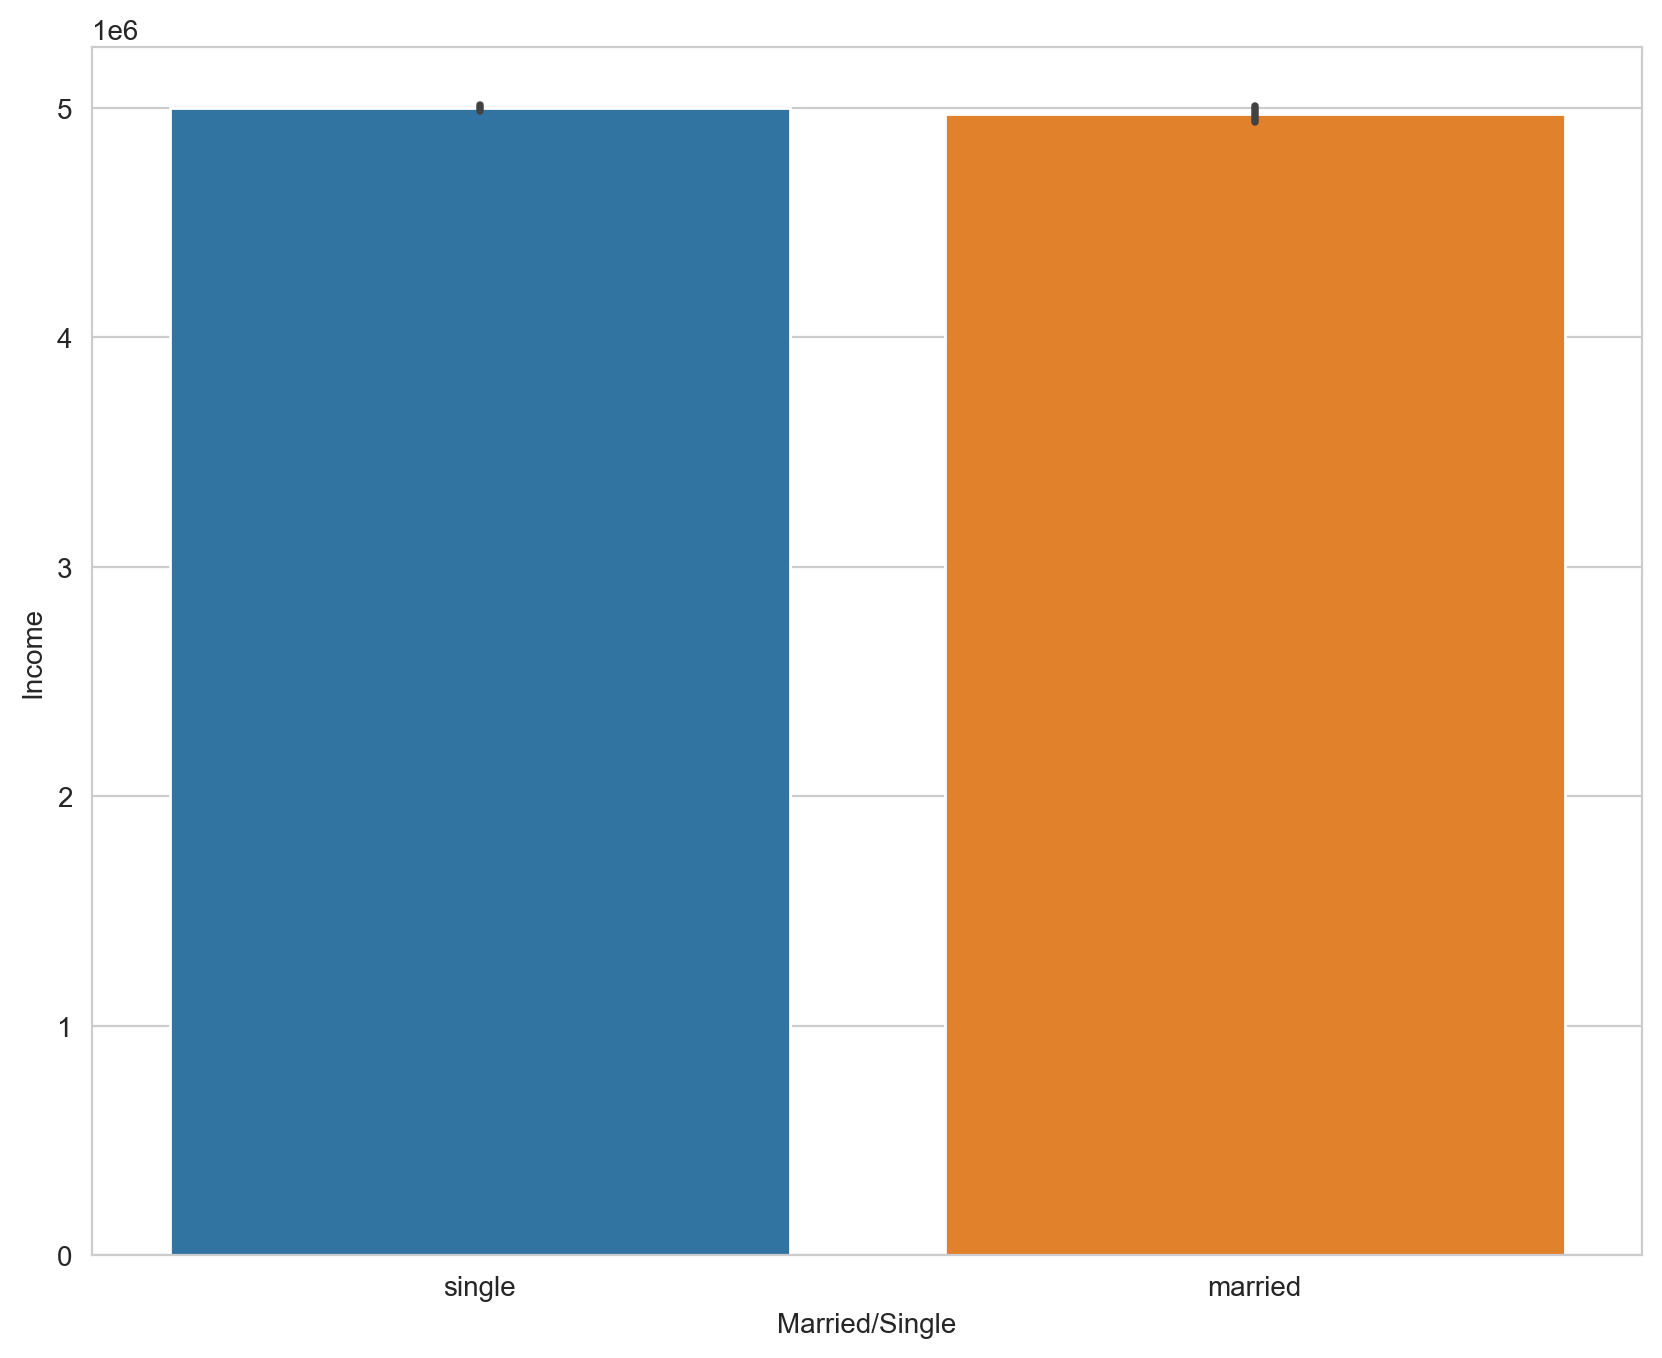

In [9]:
#checking the distribution of the income for both married and single people
plt.figure(figsize=(10,8), dpi=200)
sns.barplot(x='Married/Single', y='Income', data=loan)

<AxesSubplot:xlabel='House_Ownership', ylabel='Income'>

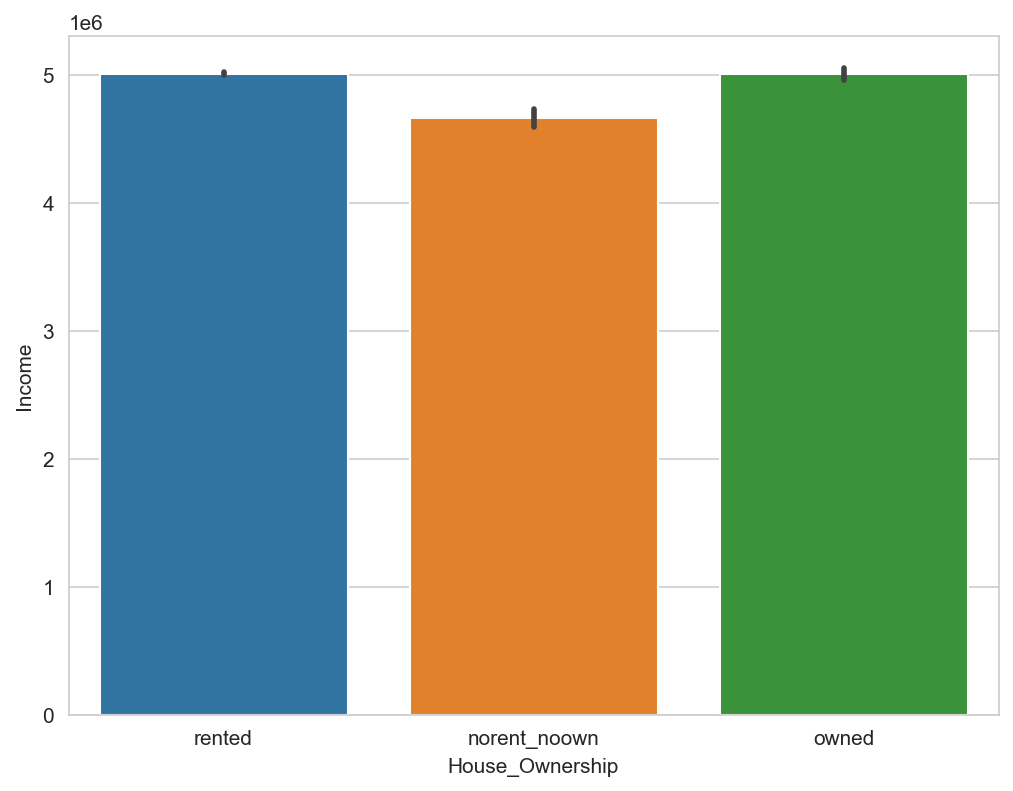

In [10]:
plt.figure(figsize=(8,6), dpi=150)
sns.barplot(x='House_Ownership', y='Income', data=loan)

<AxesSubplot:>

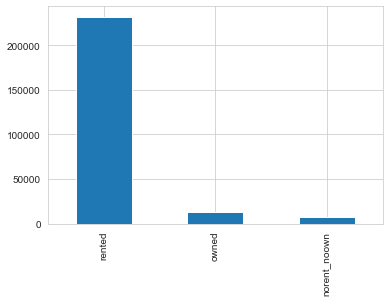

In [11]:
loan['House_Ownership'].value_counts().plot.bar()

In [8]:
loan.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


<AxesSubplot:>

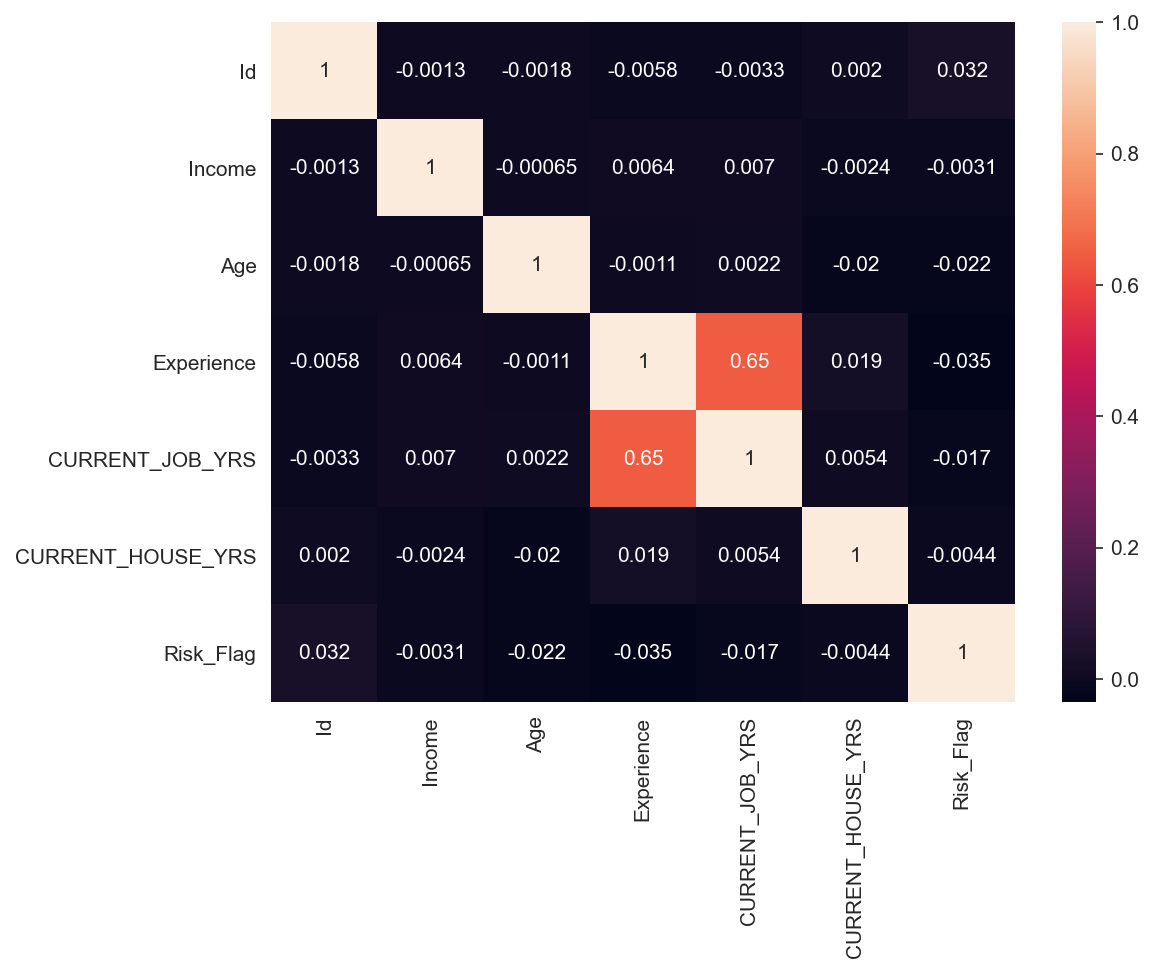

In [13]:
#checking the corellartion
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(loan.corr(), annot=True)

In [14]:
len(loan['Profession'].value_counts())

51

In [15]:
loan['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [16]:
loan['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [17]:
loan.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [40]:
# droping columns that are not needed
loan.drop(['Id','Profession', 'CITY', 'STATE'], axis=1, inplace=True)

In [41]:
loan.head(3)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0


In [42]:
# encoding the categorical variables

loan_enc = pd.get_dummies(loan, columns=["Married/Single", "House_Ownership", "Car_Ownership"], drop_first=True)

In [43]:
loan_enc.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,3,13,0,1,0,1,0
1,7574516,40,10,9,13,0,1,0,1,0
2,3991815,66,4,4,10,0,0,0,1,0
3,6256451,41,2,2,12,1,1,0,1,1
4,5768871,47,11,3,14,1,1,0,1,0


In [44]:
loan_enc['Risk_Flag'].value_counts(normalize=True)

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

### MODEL

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# declaring independent and dependent variable
X = loan_enc.drop('Risk_Flag', axis=1)
y = loan_enc['Risk_Flag']

# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

# Training the algorithm
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
print(f'This the train accuracy {rf.score(X_train, y_train) * 100 }%')
print(f'This the test accuracy {rf.score(X_test, y_test) * 100}%')

This the train accuracy 93.65625%
This the test accuracy 89.89484126984128%


In [53]:
pred = rf.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     44250
           1       0.88      0.96      0.92     44152

    accuracy                           0.91     88402
   macro avg       0.92      0.91      0.91     88402
weighted avg       0.92      0.91      0.91     88402

[[38314  5936]
 [ 1720 42432]]


Thank you